<a href="https://colab.research.google.com/github/nooraovo/nooraovo.github.io/blob/main/Multi_neuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
## prepare
import torch
import time
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt

device=torch.device("cpu")
dtype=torch.float

N,D_in,D_out,H=1,5,1,10
# N：input number(=1)
# D_in: input dimension
# D_out: output dimension(=1)
# H: hidden dimension(neuron number)

q=3 # relu function
m=3 # modify

class MyReLU(torch.nn.Module):
    def __init__(self):
        super(MyReLU, self).__init__()  # 和自定义模型一样，第一句话就是调用父类的构造函数
    def forward(self, input):
          input=input.clamp(min=0)
          output=torch.pow(input,q)
          return output

In [63]:
# training case
x=torch.randn(N,D_in,device=device)
torch.nn.init.normal_(x, 0, 1) # initialize x
x=x/x.norm()

# generate target
u=torch.rand(D_in,D_out,device=device)
u=u/u.norm() # ||u||=1
y=x.mm(u)
layer=MyReLU()
y=layer(y)

tensor(5.4000e-05, grad_fn=<MseLossBackward0>)


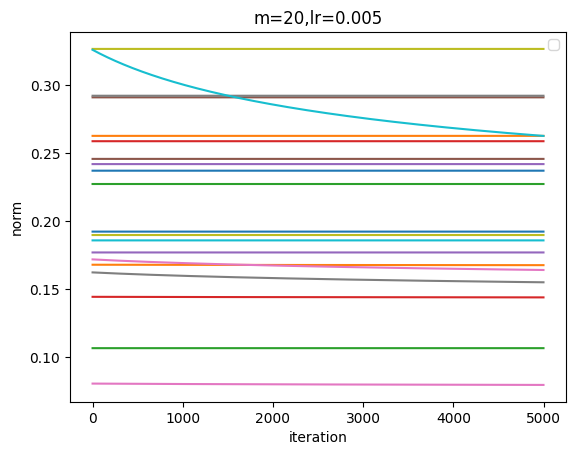

tensor(6.7505e-05, grad_fn=<MseLossBackward0>)


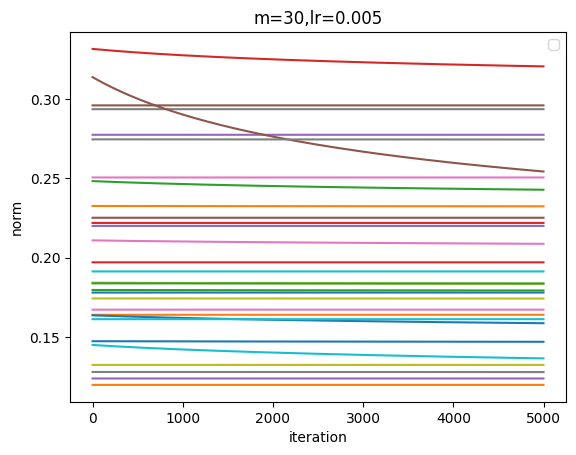

tensor(0.0001, grad_fn=<MseLossBackward0>)


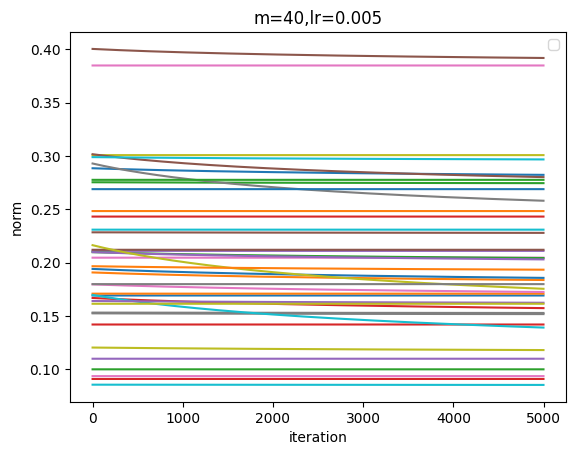

tensor(0.0002, grad_fn=<MseLossBackward0>)


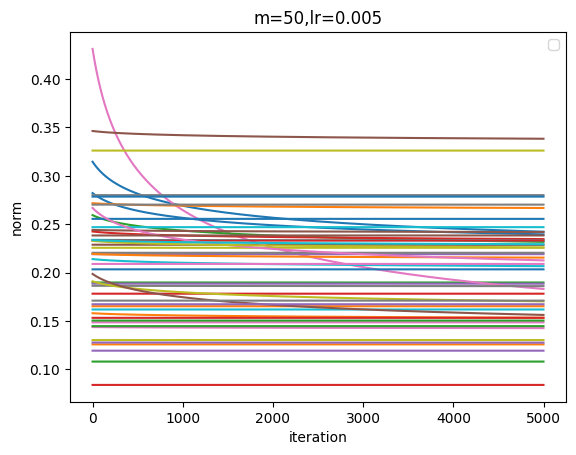

In [88]:
# original version
itr=5000
learning_rate=0.005
m_list=[20, 30, 40, 50]
loss_data=np.zeros((4,itr))

for i in range(len(m_list)):
  m=m_list[i]
  norm_list=np.zeros((m,itr))
  # student network
  model = torch.nn.Sequential(
    torch.nn.Linear(D_in,m,bias=False), # w matrix
    MyReLU(),
    torch.nn.Linear(m,D_out,bias=False), # v matrix
  )

  torch.nn.init.normal_(model[0].weight, 0, 0.1) # initialize w
  torch.nn.init.constant_(model[2].weight, 1) # initialize v
  # sum up all students
  loss_fn = nn.MSELoss(reduce='sum')
  # begin training
  for it in range(itr):
      #forword pass
      y_hat=model(x)

      #compute loss
      loss = loss_fn(y_hat, y)
      # print loss
      loss_data[i][it]=loss.item()
      for j in range(m):
        norm_list[j][it]=model[0].weight[j].norm().item()

      # backward propagate
      loss.backward()

      # update student
      with torch.no_grad():
        for param in model.parameters():
          param -= learning_rate * param.grad
          break # only update w1
      model.zero_grad()
  print(loss)

  # plot
  fig,ax = plt.subplots()
  for i in range(m):
    ax.plot(norm_list[i])
  ax.set_xlabel('iteration')
  ax.set_ylabel('norm')
  ax.legend()
  plt.title('m={0},lr={1}'.format(m,learning_rate))
  plt.show()

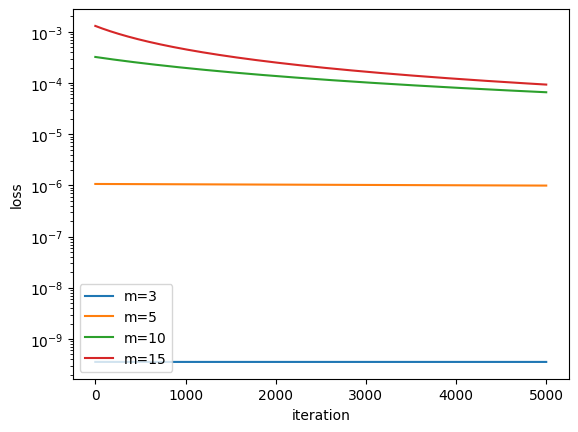

In [86]:
# plot
fig,ax = plt.subplots()
plt.yscale('log')
ax.plot(loss_data[0],label='m=3')
ax.plot(loss_data[1],label='m=5')
ax.plot(loss_data[2],label='m=10')
ax.plot(loss_data[3],label='m=15')
ax.set_xlabel('iteration')
ax.set_ylabel('loss')
ax.legend()
plt.show()

tensor(2.9620e-11, grad_fn=<MseLossBackward0>)


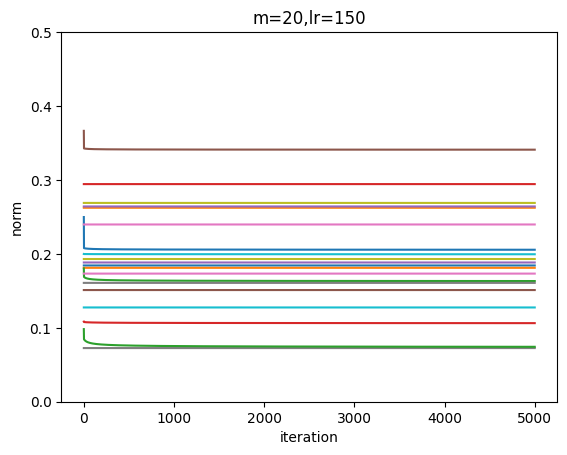

tensor(1.8655e-11, grad_fn=<MseLossBackward0>)


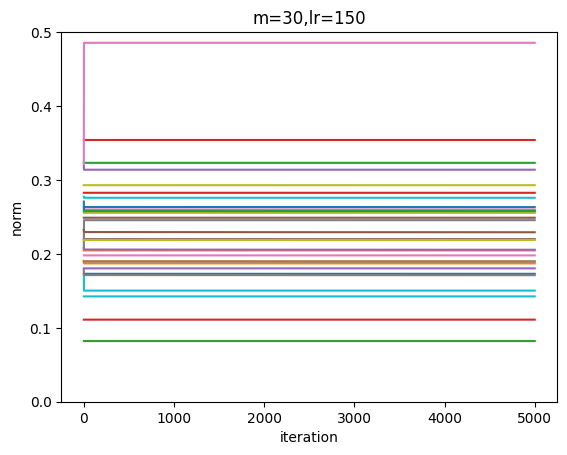

tensor(2.2342e-12, grad_fn=<MseLossBackward0>)


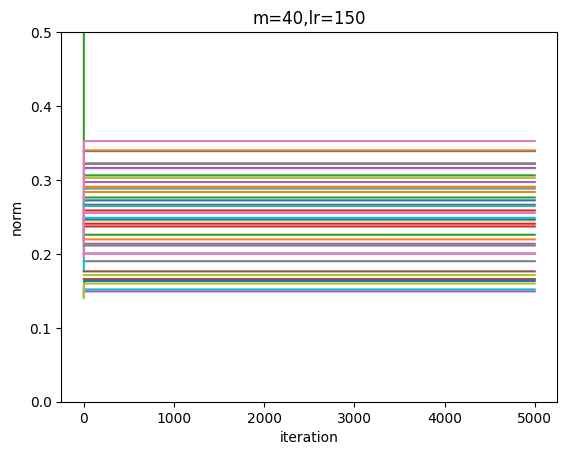

tensor(8.2832e-12, grad_fn=<MseLossBackward0>)


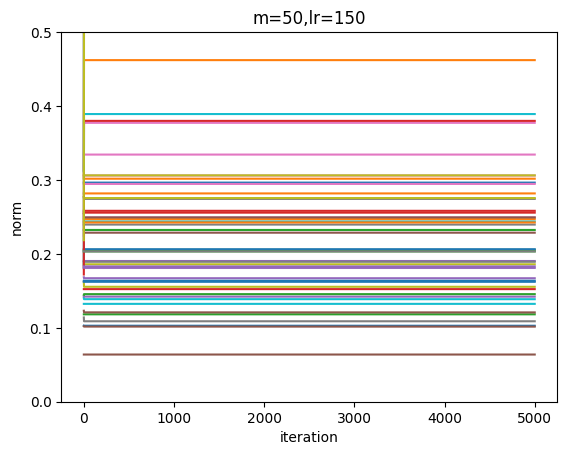

In [122]:
# original version
itr=5000
learning_rate=150
m_list=[20, 30, 40, 50]
loss_data=np.zeros((4,itr))

for i in range(len(m_list)):
  m=m_list[i]
  norm_list=np.zeros((m,itr))
  # student network
  model = torch.nn.Sequential(
    torch.nn.Linear(D_in,m,bias=False), # w matrix
    MyReLU(),
    torch.nn.Linear(m,D_out,bias=False), # v matrix
  )
  torch.nn.init.normal_(model[0].weight, 0, 0.1) # initialize w
  torch.nn.init.constant_(model[2].weight, 1) # initialize v
  # sum up all students
  loss_fn = nn.MSELoss(reduce='sum')
  # begin training
  for it in range(itr):
      #forword pass
      y_hat=model(x)

      #compute loss
      loss = loss_fn(y_hat, y)
      # print loss
      loss_data[i][it]=loss.item()
      for j in range(m):
        norm_list[j][it]=model[0].weight[j].norm().item()

      # backward propagate
      loss.backward()

      # update student
      with torch.no_grad():
        for param in model.parameters():
          param -= learning_rate * param.grad
          break # only update w1
      model.zero_grad()
  print(loss)

  # plot
  fig,ax = plt.subplots()
  plt.ylim(0,0.5)
  for i in range(m):
    ax.plot(norm_list[i])
  ax.set_xlabel('iteration')
  ax.set_ylabel('norm')
  plt.title('m={0},lr={1}'.format(m,learning_rate))
  plt.show()